<a href="https://colab.research.google.com/github/Vidy4/Praktikum_AI_Workflow/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
data = {
    "Tanggal":["2025 - 01 - 02", "2025 - 01 - 03", "2025 - 01 - 04", "2025 - 01 - 05", "2025 - 01 - 01", "2025 - 01 - 06", "2025 - 01 - 07", "2025 - 01 - 08", "2025 - 01 - 09", "2025 - 01 - 10"],
    "Produk":["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Goreng", "Teh Celup", "Margarin", "Telur", "Cuka", "Permen"],
    "Jumlah Terjual":[10, 5, 7, 3, 12, 25, 9, 11, 20, 11],
    "Stok":[20, 15, 8, 12, 25, 24, 22, 26, 21, 5],
    "Harga Satuan":[15000, 12000, 13000, 12000, 4500, 1500, 7000, 3000, 4000, 1000],
}

dt = pd.DataFrame(data)

dt.to_csv("data_penjualan_latihan_csv")

dt

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan
0,2025 - 01 - 02,Minyak Goreng,10,20,15000
1,2025 - 01 - 03,Beras,5,15,12000
2,2025 - 01 - 04,Gula,7,8,13000
3,2025 - 01 - 05,Tepung,3,12,12000
4,2025 - 01 - 01,Mie Goreng,12,25,4500
5,2025 - 01 - 06,Teh Celup,25,24,1500
6,2025 - 01 - 07,Margarin,9,22,7000
7,2025 - 01 - 08,Telur,11,26,3000
8,2025 - 01 - 09,Cuka,20,21,4000
9,2025 - 01 - 10,Permen,11,5,1000


In [51]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         10 non-null     object
 1   Produk          10 non-null     object
 2   Jumlah Terjual  10 non-null     int64 
 3   Stok            10 non-null     int64 
 4   Harga Satuan    10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


**Transformasi Data**


In [52]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])

dt["Total Penjualan"] = (dt["Jumlah Terjual"] * dt["Harga Satuan"])
dt["Keuntungan"] = (dt["Total Penjualan"] - dt["Jumlah Terjual"] * 10000)
dt

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan,Total Penjualan,Keuntungan
0,2025-01-02,Minyak Goreng,10,20,15000,150000,50000
1,2025-01-03,Beras,5,15,12000,60000,10000
2,2025-01-04,Gula,7,8,13000,91000,21000
3,2025-01-05,Tepung,3,12,12000,36000,6000
4,2025-01-01,Mie Goreng,12,25,4500,54000,-66000
5,2025-01-06,Teh Celup,25,24,1500,37500,-212500
6,2025-01-07,Margarin,9,22,7000,63000,-27000
7,2025-01-08,Telur,11,26,3000,33000,-77000
8,2025-01-09,Cuka,20,21,4000,80000,-120000
9,2025-01-10,Permen,11,5,1000,11000,-99000


**Data Modelling**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = dt[["Jumlah Terjual", "Stok"]]
y = (dt["Stok"] < 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = model.predict(X_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


In [55]:
produk_baru = [[8, 6]]
predict = model.predict(produk_baru)

if predict[0]  == 1:
  print("Perlu di restock")
else:
  print("Stock masih cukup")

Stock masih cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<ipython-input-56-3bb7d6093531>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Produk", y="Total Penjualan", data=dt, palette="viridis")


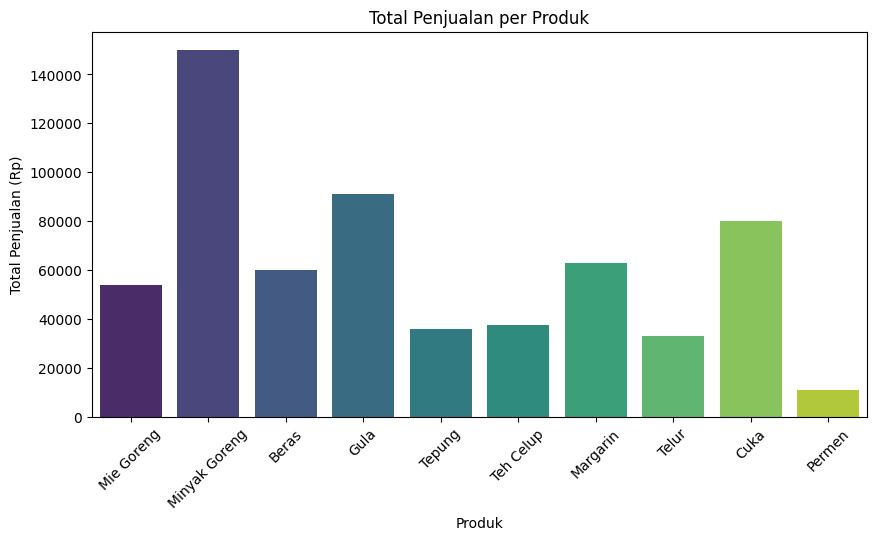

<ipython-input-56-3bb7d6093531>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Produk", y="Keuntungan", data=dt, palette="coolwarm")


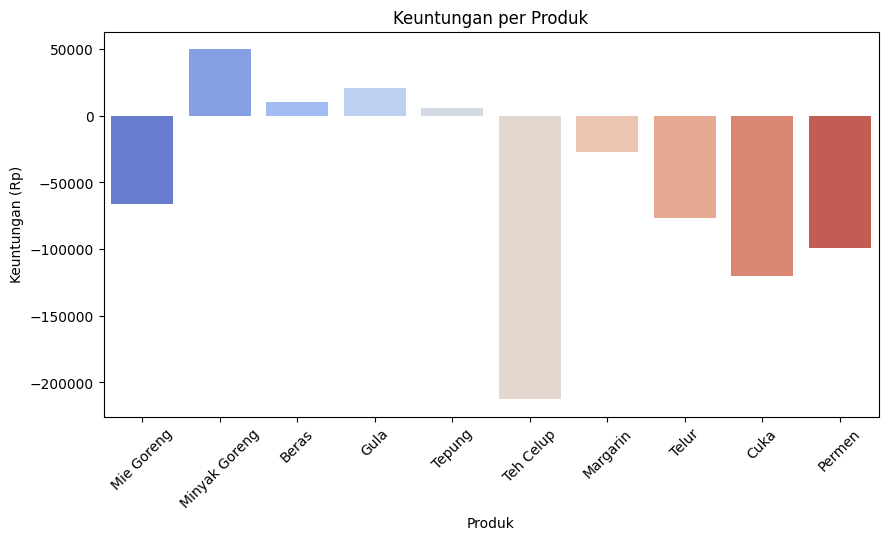

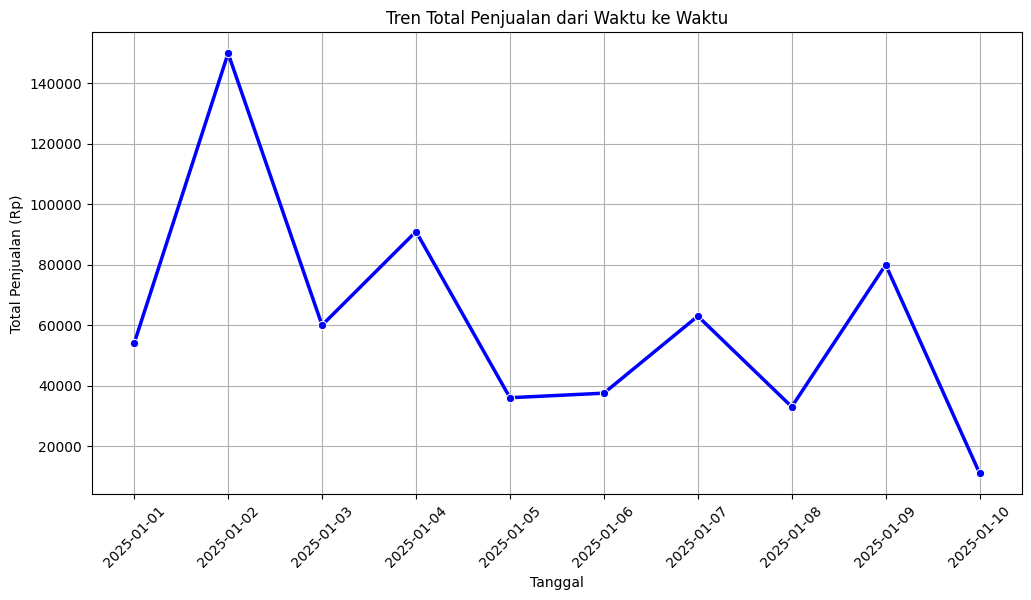

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])
dt = dt.sort_values("Tanggal")

plt.figure(figsize=(10, 5))
sns.barplot(x="Produk", y="Total Penjualan", data=dt, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Penjualan per Produk")
plt.xlabel("Produk")
plt.ylabel("Total Penjualan (Rp)")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Produk", y="Keuntungan", data=dt, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Keuntungan per Produk")
plt.xlabel("Produk")
plt.ylabel("Keuntungan (Rp)")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Tanggal", y="Total Penjualan", data=dt, marker="o", linewidth=2.5, color="b")
plt.xticks(rotation=45)
plt.title("Tren Total Penjualan dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan (Rp)")
plt.grid(True)
plt.show()
